In [1]:
import numpy as np
import matplotlib
import os
import SimpleITK as sitk
import util
from scipy.misc import imresize
%matplotlib inline
matplotlib.rcParams.update({'font.size': 24})
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def disable_scroll():
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")
    
disable_scroll()

<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [2]:
from definitions import Definitions

config = Definitions()

print config.src_dir
print config.data_dir
print config.images

/media/marsdenlab/Data2/aorticDissectionDL/python/definitions.pyc
/media/marsdenlab/Data2/aorticDissectionDL/data
['1', '3', '5', '7', '8', '9', '11', '14']


In [3]:
IMAGE_NUM = 1
print util.get_image_path(config.data_dir,config.images[IMAGE_NUM])
image,label = util.get_image_and_label(config.data_dir,config.images[IMAGE_NUM])
print "Image: shape {}, max {}, min {}".format(image.shape,np.amax(image),
                                               np.amin(image))
print "Label: shape {}, max {}, min {}".format(label.shape,np.amax(label),
                                               np.amin(label))


('/media/marsdenlab/Data2/aorticDissectionDL/data/Aorta1/Source/3/3/73681929/73681193', '/media/marsdenlab/Data2/aorticDissectionDL/data/Aorta1/Segmentation/3/3/73681929/04817204')
Image: shape (439, 512, 512), max 3071, min -3024
Label: shape (439, 1024, 1024, 3), max 255, min 0


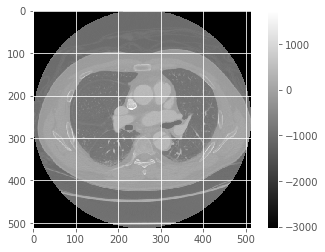

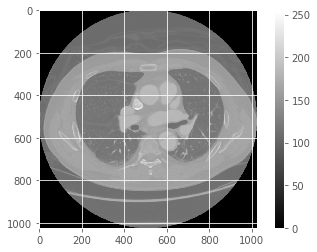

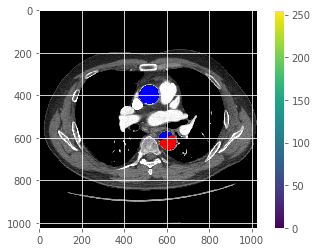

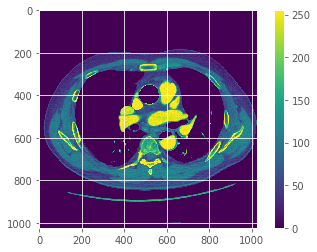

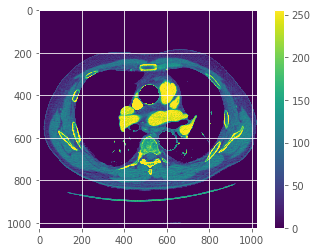

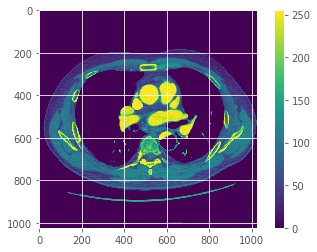

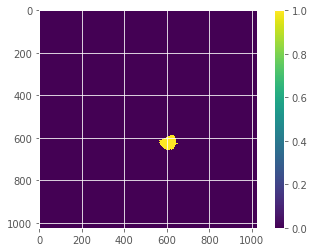

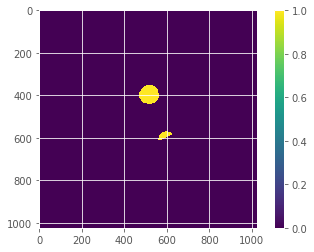

In [4]:
slice = 200
rev_slice = image.shape[0]-slice-1
plt.figure()
plt.imshow(image[rev_slice,:,:],cmap='gray')
plt.colorbar()
plt.show()

x = imresize(image[rev_slice,:,:],(label.shape[1],label.shape[2]))
plt.figure()
plt.imshow(x,cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(label[slice,:,:])
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(label[slice,:,:,0])
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(label[slice,:,:,1])
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(label[slice,:,:,2])
plt.colorbar()
plt.show()

plt.figure()
plt.imshow((label[slice,:,:,0]-label[slice,:,:,1])>0)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow((label[slice,:,:,2]-label[slice,:,:,1])>0)
plt.colorbar()
plt.show()

In [5]:
a = np.where((label[slice,:,:,2]-label[slice,:,:,1])>0)
print a[0].shape
print len(a[0])

(8244,)
8244


In [11]:
#Note the segmentations appear to be reversed along the axial dimension
def get_patches(image,label, patch_size=400):
    N,H,W = image.shape
    print "image shape = {}, label shape ={}".format(image.shape,label.shape)
    
    labels = []
    images = []
    for i in range(N):
        i_l = N-i-1
        impatch = image[i]
        true = (label[i_l,:,:,0] - label[i_l,:,:,1]) > 0
        false = (label[i_l,:,:,2] - label[i_l,:,:,1]) > 0
        
        if np.sum(true) > 0:
            impatch = imresize(impatch,true.shape)
            inds = np.where(true>0)
            r = np.random.randint(len(inds[0]))
            ix = inds[0][r]
            iy = inds[1][r]
            
            x_start = ix-patch_size/2
            x_end = ix+patch_size/2
            y_start = iy-patch_size/2
            y_end = iy+patch_size/2
            
            im_x = impatch[x_start:x_end,y_start:y_end]
            im_true = true[x_start:x_end,y_start:y_end]
            im_false = false[x_start:x_end,y_start:y_end]
            im_empty = np.ones_like(im_x) -im_true - im_false
            
            im_label = np.zeros_like(im_x)
            im_label[im_true==1] = 1
            im_label[im_false==1] = 2
            
            images.append(im_x)
            labels.append(im_label)
            
    return images,labels

In [12]:
X,Y = get_patches(image,label)

image shape = (439, 512, 512), label shape =(439, 1024, 1024, 3)


341 341


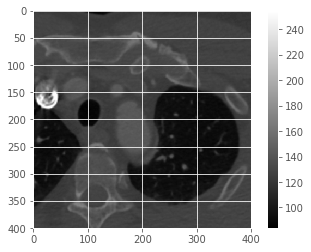

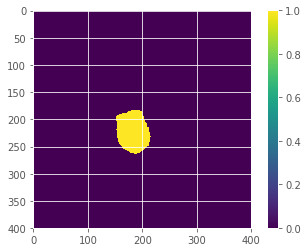

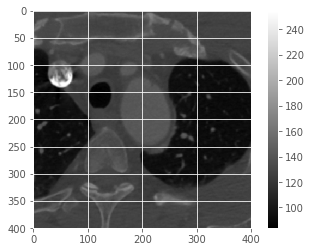

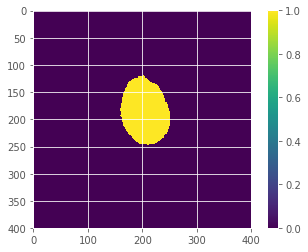

In [ ]:
print len(X), len(Y)
for i in range(5):
    j = np.random.randint(len(X))
    
    plt.figure()
    plt.imshow(X[j],cmap='gray')
    plt.colorbar()
    plt.show()
    
    plt.figure()
    plt.imshow(Y[j])
    plt.colorbar()
    plt.show()